# Assignment 1
## Authors go here maybe
### 1. Creating the scatter plot

The following cell will import the csv files and convert into dataframes, filtering the most recent entry (2019)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#Load dataframes
dfPerCapita = pd.read_csv('gdp-per-capita-penn-world-table.csv')
dfLE = pd.read_csv('life-expectancy.csv')
dfGDP = pd.read_csv("national-gdp-penn-world-table.csv")

#Filter most recent LE and GDP per capita data (2019)

perCapitaGDP = dfPerCapita[dfPerCapita.Year == 2019]

LE  = dfLE[dfLE.Year == 2019]

GDP = dfGDP[dfGDP.Year == 2019]
GDP = GDP.rename(columns={'Entity' : 'Country','GDP (output, multiple price benchmarks)' : 'GDP'})
GDP = GDP[['Country', 'GDP']]

Next, merge the two dataframes by the default inner merge to ensure corresponding countries get listed with their respective GDP and LE. This will removes zones (Europe, World, etc) and keeps countries only

**Caution**: This will also scrub the countries which do not have a listed GDP for the year 2019. For the sake of the assignment, we will omit these countries from the coming discussions/analysis

In [41]:
combDF = perCapitaGDP.merge(LE) #inner merge by default, ensures scrubbing of zones and keeps countries

combDF.columns = ['Country', 'Code', 'Year', 'GDP per capita', 'LE'] #rename columns for easier handling
combDF = combDF[['Country', 'GDP per capita', 'LE']]

combDF = combDF.merge(GDP)

combDF.describe()

,GDP per capita,LE,GDP
count,178.000000,178.000000,1.780000e+02
mean,22053.922122,73.047554,7.013605e+11
std,21675.777270,7.519209,2.356838e+12
min,790.046000,52.910400,7.769418e+07
25%,5471.652725,67.201625,2.809709e+10
50%,14359.147000,74.249200,9.305522e+10
75%,31622.840750,78.720525,4.616077e+11
max,114100.810000,85.273500,2.059584e+13


Create the scatter plot (will need to make this better and more readable)

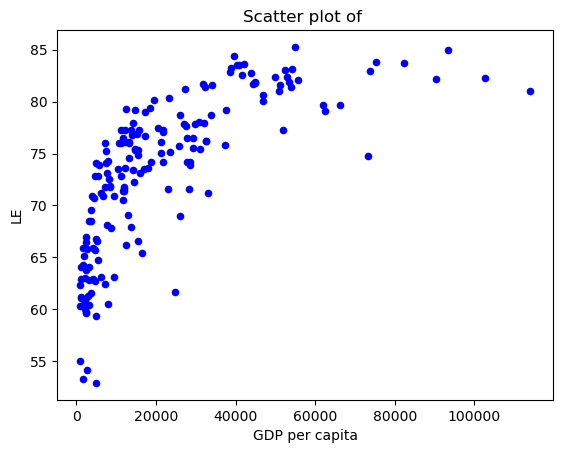

In [30]:
combDF.plot(kind='scatter', 
        x='GDP per capita', 
        y='LE', 
        color='blue') 
  
# set the title 
plt.title('Scatter plot of ') 
  
# show the plot 
plt.show() 

### 2. Answers to questions in the assignment

#### Question 1: Which countries have a life expectancy higher than one standard deviation above the mean?

In [18]:
meanLE = combDF["LE"].mean()
stdLE = combDF["LE"].std()

countriesHigherThanSTD = combDF[combDF.LE > meanLE + stdLE]
countriesHigherThanSTD["Country"]

7           Australia
8             Austria
15            Belgium
18            Bermuda
31             Canada
44             Cyprus
47            Denmark
59            Finland
60             France
64            Germany
66             Greece
74          Hong Kong
76            Iceland
81            Ireland
82             Israel
83              Italy
85              Japan
97         Luxembourg
98              Macao
104             Malta
117       Netherlands
118       New Zealand
123            Norway
132          Portugal
133             Qatar
146         Singapore
149          Slovenia
151       South Korea
152             Spain
156            Sweden
157       Switzerland
159            Taiwan
171    United Kingdom
Name: Country, dtype: object

#### Question 2: Which countries have high life expectancy but have low GDP?
Definition for high  life expectancy taken by the previous results (one standard deviation above the mean) Can we assume normal distribution (no)?

Import data from "Data source: Feenstra et al. (2015), Penn World Table (2021)" Same as previous but for total GDP

In [40]:
meanGDP = combDF['GDP'].mean()
stdGDP = combDF['GDP'].std()

lowGDP = combDF[combDF.GDP < meanGDP ]

highLELowGDP = lowGDP[lowGDP.LE > 60]

highLELowGDP

,Country,GDP per capita,LE,GDP
0,Albania,12531.7880,79.2825,36103040000
1,Algeria,11787.4920,76.4742,507487550000
2,Angola,7159.5790,62.4484,227855710000
3,Anguilla,15177.9230,76.8816,225680530
5,Armenia,14735.1380,75.4386,43582575000
...,...,...,...,...
170,United Arab Emirates,66112.7200,79.7262,645956240000
173,Uruguay,20545.4220,77.5085,71122790000
175,Yemen,1777.2511,65.0917,51828060000
176,Zambia,3179.1958,62.7926,56783716000
